In [49]:
# Program to perform Sentiment Analysis on Twitter dataset to classify the tweets into depressed and not depressed.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#importing the dataset
tweets = pd.read_csv("sentiment_tweets3.csv")
tweets.head()

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [51]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
Unnamed: 0    10314 non-null int64
message       10314 non-null object
label         10314 non-null int64
dtypes: int64(2), object(1)
memory usage: 241.8+ KB


In [52]:
#dropping the unnamed column
#axis 0 = rows axis 1 = column
tweets= tweets.drop("Unnamed: 0",axis=1)

In [53]:
tweets.head()

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [54]:
#get the total counts of the labels
tweets["label"].value_counts()

0    8000
1    2314
Name: label, dtype: int64

Text(0.5, 1.0, 'Dataset class distribution')

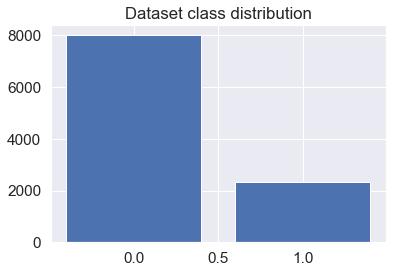

In [55]:
#visually seeing the distribution of data in different classes
%matplotlib inline

from collections import Counter
target_cnt = Counter(tweets.label)

plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset class distribution")

In [56]:
#creating a function to clean the free text using n-grams, stop word removal and stemming

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def clean_message(message, lower_case = True, stem = True, stop_words = True, gram = 1):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return ' '.join(words)
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    sentence = ' '.join(words)
    return sentence

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fbazil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [57]:
#clean the messages and save in a new column
tweets['clean_message'] = tweets['message'].apply(lambda x: clean_message(x))

tweets['clean_message'] 

0                       real good moment missssssssss much
1                       read manga http //plurk.com/p/mzp1
2        comeagainjen http //twitpic.com/2y2lx http //w...
3        lapcat need send 'em account tomorrow oddli n'...
4                         add myspac myspace.com/lookthund
5                          sleepi good time tonight though
6        silkcharm nbn someon alreadi said fiber home m...
7                                24ï¿½c possibl today nice
8                            nite twittervil workout -ciao
9                          danann night darlin sweet dream
10                                     good morn everybodi
11       final creat wordpress blog alreadi blog seattl...
12                    kisha cnt get til get frm rememb top
13           nicolerichi ye rememb band awesom pleas repli
14                              realli love reflect shadow
15           blueaero ooo fantasi like fantasi novel check
16       rokchic28 prob sell noth blog http //snedwan.c.

In [58]:
# implementing TF_IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# tf_vectorizer = TfidfVectorizer(ngram_range=(2,2), stop_words='english')
tf_vectorizer = TfidfVectorizer(stop_words='english')

#fit and transfor,Learn the vocabulary dictionary and return term-document matrix.
X = tf_vectorizer.fit_transform(tweets.clean_message)
print(tf_vectorizer.get_feature_names())

['00', '000', '00007â', '00152258', '007peter', '00am', '00pm', '02', '02am', '03', '03q2yx', '04', '042418', '0435xcwpc2', '0438138242743153', '06', '0628', '07', '07958938647', '08', '09', '09638237', '09casper', '0_0', '0ahukewirjnbe7dtaahvgkgmkhu58bx4q_auieygd', '0beck', '0bqk7k3z5i', '0i22i30j33i22i29i30l4', '0j36j4j1', '0j41j0i131j0i67j0i131i67j33i160', '0ltrdaj', '0ssnsdl0nh', '0x526vj', '10', '100', '1000', '10000', '1002', '10066808', '100âº', '101', '1011', '10156186831475782', '10156368936572238â', '10160250333315331â', '101alternativehealing', '10204373831102704â', '10216818240038376â', '10530', '106andpark', '1080', '109', '10aac3aâ', '10am', '10pm', '10th', '10x', '10yearsofenema', '10yr', '11', '110', '111448716', '112ro8', '11346264â', '113ph6', '11717343â', '1176', '11943236', '11e8', '11rep', '12', '1200', '121981_4562', '1225â', '123', '1284836754953259â', '12g9r', '12kof0', '12mp', '12pm', '12th', '12to', '13', '130', '13283521', '13cwwchdsc', '13flat', '13th', '14'

In [59]:
X.shape[0]

10314

In [60]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
y = tweets.label
X_train , X_test , y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [61]:
# getting the percentage of testing data
(X_train.shape)
print((X_test.shape[0])/((X_train.shape[0])+(X_test.shape[0]))*100)

20.001939111886756


In [62]:
# getting the percentage of testing data

print((X_train.shape[0])/((X_train.shape[0])+(X_test.shape[0]))*100)

79.99806088811324


In [63]:
#implementing the Naive Bayes classifier

from sklearn import naive_bayes
from sklearn.metrics import accuracy_score

# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(X_test)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  92.72903538536113


In [64]:
#classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

target_names = ['not depressed', 'depressed']

print("Classification report:")
print(classification_report(y_test, predictions_NB, target_names=target_names))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, predictions_NB)
print(cm)

Classification report:
               precision    recall  f1-score   support

not depressed       0.92      1.00      0.96      1614
    depressed       0.99      0.67      0.80       449

    micro avg       0.93      0.93      0.93      2063
    macro avg       0.95      0.83      0.88      2063
 weighted avg       0.93      0.93      0.92      2063

Confusion Matrix:
[[1612    2]
 [ 148  301]]


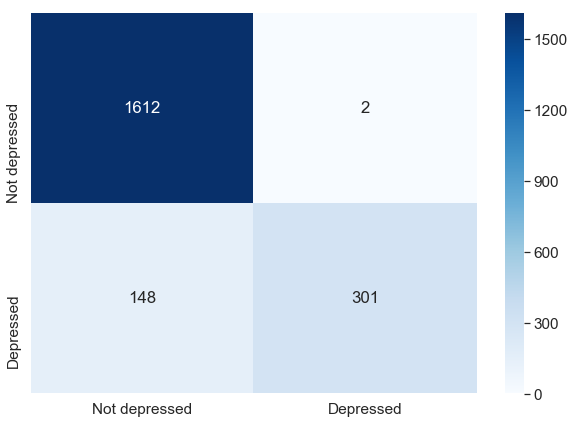

In [65]:
#plotting the confusion matrix
import seaborn as sns

# Create labels 
labels = ["Not depressed" if label == 0 else "Depressed" for label in tweets.label.unique()]

sns.set(font_scale=1.4) # for font size 
df_cm = pd.DataFrame(cm, index = [i for i in labels], 
                    columns = [i for i in labels])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='g')

In [66]:
#implementing the SVM classifier
from sklearn import svm

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  99.41832283082888


In [67]:
#classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

target_names = ['not depressed', 'depressed']

print("Classification report:")
print(classification_report(y_test, predictions_SVM, target_names=target_names))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, predictions_SVM)
print(cm)

Classification report:
               precision    recall  f1-score   support

not depressed       0.99      1.00      1.00      1614
    depressed       1.00      0.98      0.99       449

    micro avg       0.99      0.99      0.99      2063
    macro avg       1.00      0.99      0.99      2063
 weighted avg       0.99      0.99      0.99      2063

Confusion Matrix:
[[1613    1]
 [  11  438]]


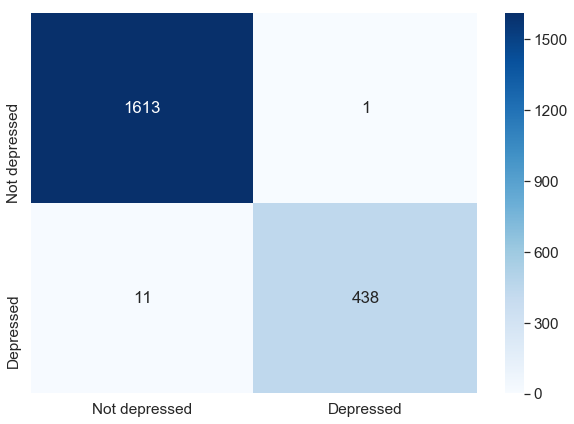

In [68]:
#plotting the confusion matrix
import seaborn as sns

# Create labels 
labels = ["Not depressed" if label == 0 else "Depressed" for label in tweets.label.unique()]

sns.set(font_scale=1.4) # for font size 
df_cm = pd.DataFrame(cm, index = [i for i in labels], 
                    columns = [i for i in labels])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='g')

In [69]:
#implementing the Decision Tree classifier

from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)
predictions_DT = DT.predict(X_test)
predictions_DT

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
# Use accuracy_score function to get the accuracy
print("Decision Tree Accuracy Score -> ",accuracy_score(predictions_DT, y_test)*100)

Decision Tree Accuracy Score ->  99.61221522055259


In [71]:
#classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

target_names = ['not depressed', 'depressed']

print("Classification report:")
print(classification_report(y_test, predictions_DT, target_names=target_names))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, predictions_DT)
print(cm)

Classification report:
               precision    recall  f1-score   support

not depressed       1.00      1.00      1.00      1614
    depressed       1.00      0.98      0.99       449

    micro avg       1.00      1.00      1.00      2063
    macro avg       1.00      0.99      0.99      2063
 weighted avg       1.00      1.00      1.00      2063

Confusion Matrix:
[[1613    1]
 [   7  442]]


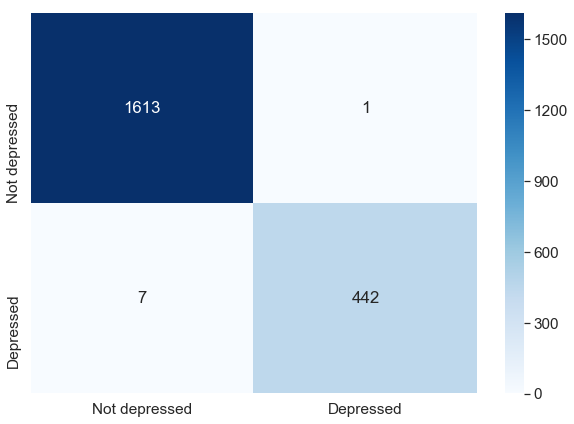

In [72]:
#plotting the confusion matrix
import seaborn as sns

# Create labels 
labels = ["Not depressed" if label == 0 else "Depressed" for label in tweets.label.unique()]

sns.set(font_scale=1.4) # for font size 
df_cm = pd.DataFrame(cm, index = [i for i in labels], 
                    columns = [i for i in labels])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='g')

In [83]:
#testing the model
#create a function to classify the tweets using the created ML model
def classify(text, classifier):
    #clean the message using clean_message function
    cleaned_text = clean_message(text)
    #only taking transform
    text_vector = tf_vectorizer.transform([cleaned_text])
    if classifier.lower() == "naive bayes":
        prediction = Naive.predict(text_vector)
    elif classifier.lower() == "svm":
        prediction = SVM.predict(text_vector)
    elif classifier.lower() == "dt":
        prediction = DT.predict(text_vector)
    else:
        prediction = -1

    if (prediction==0):
        print("Not depressed")
    elif prediction==1:
        print("Depressed")
    else:
        print("Invalid classifier provided")


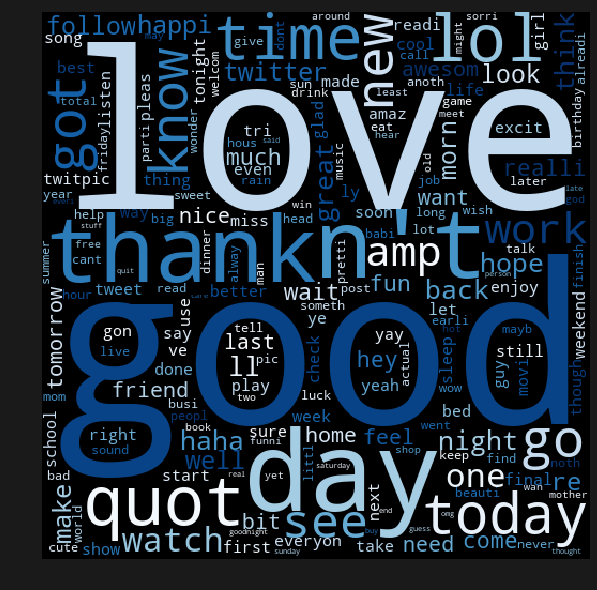

In [74]:
#creating word cloud for Not depressed tweets
from wordcloud import WordCloud
from nltk.corpus import stopwords
positive_words = ' '.join(list(tweets[tweets['label'] == 0]['clean_message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')

plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

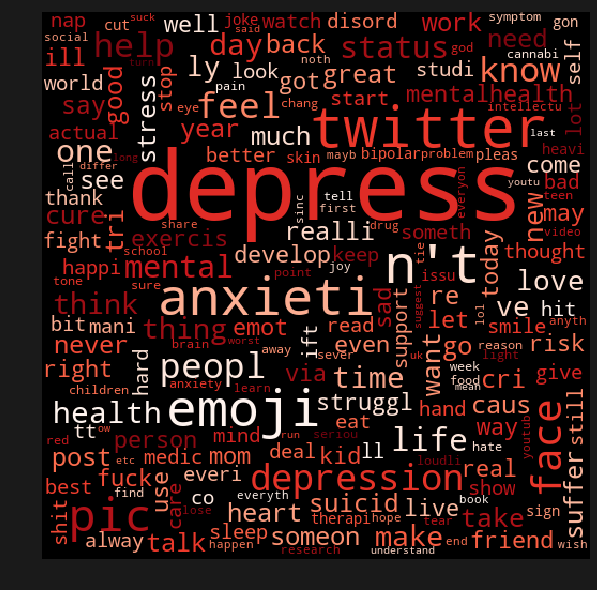

In [75]:
#creating word cloud for Depressed tweets
depressive_words = ' '.join(list(tweets[tweets['label'] == 1]['clean_message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Reds").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [76]:
#testing with Naive Bayes

In [77]:
#testing the model with new tweets
classifier = "Naive Bayes"
tweet = "i feel full of hope and happiness"
classify(tweet, classifier)

Not depressed


In [78]:
classifier = "Naive Bayes"
tweet = 'I feel good today. I have a lot of hope'
classify(tweet, classifier)

Not depressed


In [79]:
classifier = "Naive Bayes"
tweet = "I have depressed. I don't wanna talk to anyone. Don't want to step out. I want to be left alone" 
classify(tweet, classifier)

Not depressed


In [80]:
classifier = "Naive Bayes"
tweet = "I have anxiety issues and I don't feel good. "
classify(tweet, classifier)

Depressed


In [81]:
# testing with SVM

In [84]:
#testing the model with new tweets
classifier = "SVM"
tweet = "i feel full of hope and happiness"
classify(tweet, classifier)

Not depressed


In [85]:
classifier = "SVM"
tweet = 'I feel good today. I have a lot of hope'
classify(tweet, classifier)

Not depressed


In [86]:
classifier = "SVM"
tweet = "I have depressed. I don't wanna talk to anyone. Don't want to step out. I want to be left alone" 
classify(tweet, classifier)

Depressed


In [87]:
classifier = "SVM"
tweet = "I have anxiety issues and I don't feel good. "
classify(tweet, classifier)

Depressed


In [88]:
# testing with Decision Tree

In [89]:
#testing the model with new tweets
classifier = "DT"
tweet = "i feel full of hope and happiness"
classify(tweet, classifier)

Not depressed


In [90]:
classifier = "DT"
tweet = 'I feel good today. I have a lot of hope'
classify(tweet, classifier)

Not depressed


In [91]:
classifier = "DT"
tweet = "I have depressed. I don't wanna talk to anyone. Don't want to step out. I want to be left alone" 
classify(tweet, classifier)

Depressed


In [92]:
classifier = "DT"
tweet = "I have anxiety issues and I don't feel good. "
classify(tweet, classifier)

Depressed
